In [25]:
# from graph_original import *
from graph import *

import sympy
import symvec
from IPython.display import display
from sympy import *

#parameters of model
c1, c2, c3, u, D, kappa = sympy.symbols('c1 c2 c3 u D kappa')
c1t, c2t, c3t, ut, Dt, kappat = sympy.symbols('c1t c2t c3t ut Dt kappat')
alpha, a = 0, 0
# dimension and reduced surface area
d, Kd = sympy.symbols('d K_d')
# symbols for vectors
_q, _k, dot_kq = sympy.symbols('q k (k·q)')
_p, _k, dot_pk = sympy.symbols('p k (k·p)')
_q, _p, dot_qp = sympy.symbols('q p (q·p)')
_q, _r, dot_qr = sympy.symbols('q r (q·r)')
_p, _r, dot_pr = sympy.symbols('p r (p·r)')
_r, _k, dot_rk = sympy.symbols('r k (r·k)')

# assign symbol for dot product
symvec.dots[frozenset((_q,_k))] = dot_kq
symvec.dots[frozenset((_q,_p))] = dot_qp
symvec.dots[frozenset((_p,_k))] = dot_pk
symvec.dots[frozenset((_q,_r))] = dot_qr
symvec.dots[frozenset((_p,_r))] = dot_pr
symvec.dots[frozenset((_r,_k))] = dot_rk
# create vectors
k = symvec.Vector(_k)
q = symvec.Vector(_q)
p = symvec.Vector(_p)
r = symvec.Vector(_r)
def f(x, alpha, a):
    return (kappa*x**2+a)*x**alpha
# IMPORTANT: Simplify the vertex at the output
def v2(k1,k2,k3):
    expr = (c1*k3**2+2*c2*k1*k2-c3*(k2**2*k3*k1+k1**2*k3*k2)/(k3**2))*1/2
    return fraction(cancel((expr)))

def v2t(k1,k2,k3):
    expr = (c1t*k3**2+2*c2t*k1*k2-c3t*(k2**2*k3*k1+k1**2*k3*k2)/(k3**2))*1/2
    return fraction(cancel((expr)))

def v3(k1,k2,k3,k4):
    return (-u,1)


# 1- Vertex

In [34]:
# figure 2c
v = [Vertex() for i in range(3)]
v[0].link_vertex(v[1])
v[0].link_vertex(v[2])
v[2].link_vertex(v[1])
v[2].add_outgoing()
I_array = integrals_symmet(v, q, [q], f, D, k, alpha, a, v2, v3)
I2c = solve_integrals_symmet(I_array, k, [q], d, n=3)
v = [Vertex() for i in range(2)]
v[0].link_vertex(v[1])
v[0].link_vertex(v[1])
v[0].add_outgoing()
I_array = integrals_symmet(v, q, [q], f, D, k, alpha, a, v2, v3)
I3b = solve_integrals_symmet(I_array, k, [q], d, n=3)
Iprop= I2c+I3b
display(simplify(Iprop))



D*K_d*Lambda**(d - 2)*δl*(2*Lambda**2*c1*(-2*c2*d**2 - 4*c2*d - c3*d**2 + 4*c3) - 12*d*kappa*u*(d + 2) + q**2*(2*c1**2*d**2 + 4*c1**2*d - 2*c1*c2*d**2 - 4*c1*c2*d - c1*c3*d**2 + 4*c1*c3*d + 8*c2*c3*d**2 + 16*c2*c3*d - 24*c2*c3 + 4*c3**2*d**2 - 8*c3**2*d + 4*c3**2))/(4*d*kappa**2*(d + 2))

## 2- Vertex

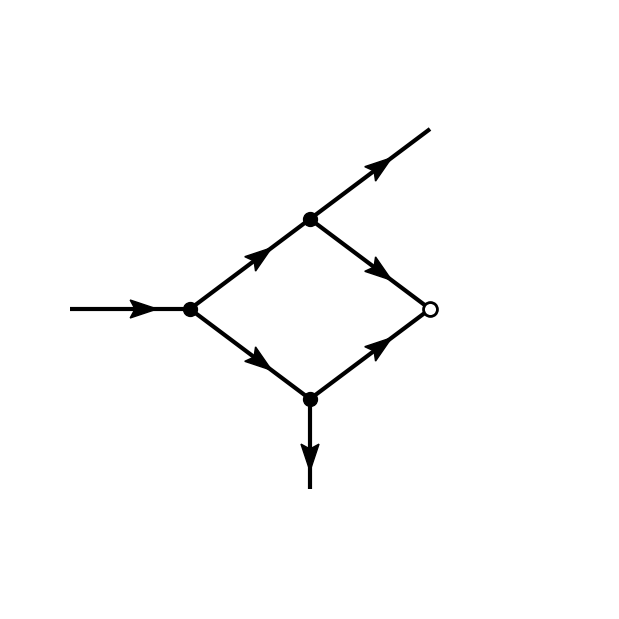

D*K_d*Lambda**(d - 2)*δl*(4*Lambda**2*c1**2*d*(-2*c2*d**2 - 4*c2*d - c3*d**2 + 4*c3) + c1*d*q**2*(4*c1**2*d**2 + 8*c1**2*d - 2*c1*c2*d**2 + 8*c1*c2 - c1*c3*d**2 + 6*c1*c3*d - 8*c1*c3 + 16*c2**2*d + 32*c2**2 + 12*c2*c3*d**2 + 16*c2*c3*d - 64*c2*c3 + 6*c3**2*d**2 - 8*c3**2*d + 8*c3**2) - 2*cos_psi*d*p*q*(-6*c1**2*c2*d**2 - 16*c1**2*c2*d - 8*c1**2*c2 + c1**2*c3*d**2 + 10*c1**2*c3*d + 4*c1**2*c3 + 8*c1*c2*c3*d**2 + 16*c1*c2*c3*d + 4*c1*c3**2*d**2 - 16*c1*c3**2 - 16*c2**3*d - 32*c2**3 + 8*c2**2*c3*d + 64*c2**2*c3 + 4*c2*c3**2*d - 40*c2*c3**2 - 2*c3**3*d + 8*c3**3) + p**2*(-12*c1**2*c2*d**3 - 32*c1**2*c2*d**2 - 16*c1**2*c2*d + 8*c1**2*c3*cos_psi**2*d**3 + 32*c1**2*c3*cos_psi**2*d**2 + 16*c1**2*c3*cos_psi**2*d + 16*c1**2*c3*cos_psi**2 - 6*c1**2*c3*d**3 - 12*c1**2*c3*d**2 - 8*c1**2*c3*d - 16*c1**2*c3 + 16*c1*c2*c3*d**3 + 32*c1*c2*c3*d**2 + 8*c1*c3**2*d**3 - 32*c1*c3**2*d - 32*c2**3*d**2 - 64*c2**3*d + 64*c2**2*c3*cos_psi**2*d - 64*c2**2*c3*cos_psi**2 + 16*c2**2*c3*d**2 + 64*c2**2*c3*d + 64*c2*

In [3]:
#figure a
v = [Vertex() for i in range(4)]
v[0].link_vertex(v[1])
v[0].link_vertex(v[2])
v[1].link_vertex(v[3])
v[2].link_vertex(v[3])
v[1].add_outgoing()
v[2].add_outgoing()

g = Graph(v)
g.plot_graph()
g.latex_graph('graph_plot')
g.label_edges(q,[p,q-p],k)

# Ia = g.integral(f, D, k, alpha, a, v2, v3=0)
# Ia = symvec.integrate3(Ia, k, q, p, d, n=3)
I_array = integrals_symmet(v, q, [p,q-p], f, D, k, alpha, a, v2, v3)
Ia = solve_integrals_symmet(I_array, k, [q, p], d, n=3)
display(simplify(Ia))


In [ ]:
from IPython.display import Image 
pil_img = Image(filename='./figures/modelB_plus_2vertex.jpg')
display(pil_img)

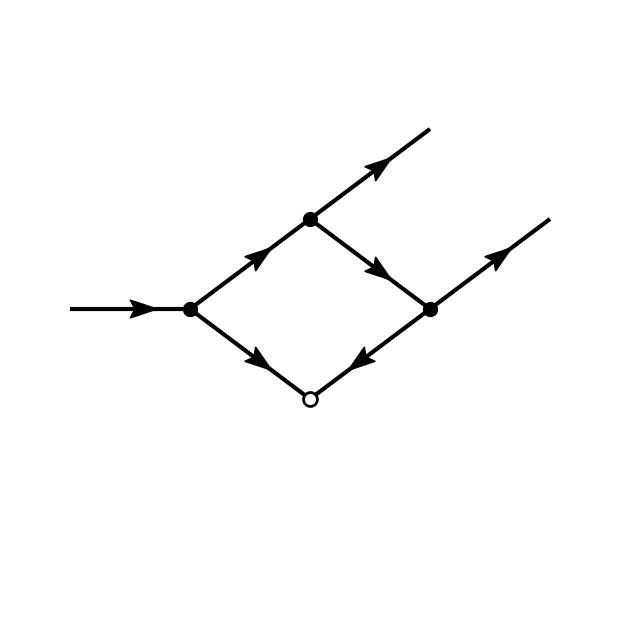

D*K_d*Lambda**(d - 2)*δl*(4*Lambda**2*c1**2*d*(-2*c2*d**2 - 4*c2*d - c3*d**2 + 4*c3) + c1*d*q**2*(4*c1**2*d**2 + 8*c1**2*d - 6*c1*c2*d**2 - 16*c1*c2*d - 8*c1*c2 - 3*c1*c3*d**2 + 10*c1*c3*d + 8*c1*c3 - 8*c2**2*d - 16*c2**2 + 16*c2*c3*d**2 + 32*c2*c3*d - 24*c2*c3 + 8*c3**2*d**2 - 14*c3**2*d) - 2*cos_psi*d*p*q*(-2*c1**2*c2*d**2 + 8*c1**2*c2 - c1**2*c3*d**2 + 2*c1**2*c3*d - 4*c1**2*c3 + 8*c1*c2**2*d**2 + 32*c1*c2**2*d + 32*c1*c2**2 + 16*c1*c2*c3*d**2 + 8*c1*c2*c3*d - 96*c1*c2*c3 + 6*c1*c3**2*d**2 - 12*c1*c3**2*d + 24*c1*c3**2 + 16*c2**3*d + 32*c2**3 - 8*c2**2*c3*d - 64*c2**2*c3 - 4*c2*c3**2*d + 40*c2*c3**2 + 2*c3**3*d - 8*c3**3) + 2*p**2*(-2*c1**2*c2*d**3 + 8*c1**2*c2*d - 8*c1**2*c3*cos_psi**2*d + 8*c1**2*c3*cos_psi**2 - c1**2*c3*d**3 + 2*c1**2*c3*d**2 + 4*c1**2*c3*d - 8*c1**2*c3 + 8*c1*c2**2*d**3 + 32*c1*c2**2*d**2 + 32*c1*c2**2*d - 32*c1*c2*c3*cos_psi**2*d + 32*c1*c2*c3*cos_psi**2 + 16*c1*c2*c3*d**3 + 8*c1*c2*c3*d**2 - 64*c1*c2*c3*d - 32*c1*c2*c3 + 48*c1*c3**2*cos_psi**2*d - 48*c1*c3**2*

In [4]:
#figure b
v = [Vertex() for i in range(4)]
v[0].link_vertex(v[1])
v[0].link_vertex(v[2])
v[2].link_vertex(v[3])
v[3].link_vertex(v[1])
v[2].add_outgoing()
v[3].add_outgoing()

g = Graph(v)
g.plot_graph()
g.latex_graph('graph_plot')

I_array = integrals_symmet(v, q, [p,q-p], f, D, k, alpha, a, v2, v3)

Ib = solve_integrals_symmet(I_array, k, [q, p], d, n=3)
display(simplify(Ib))

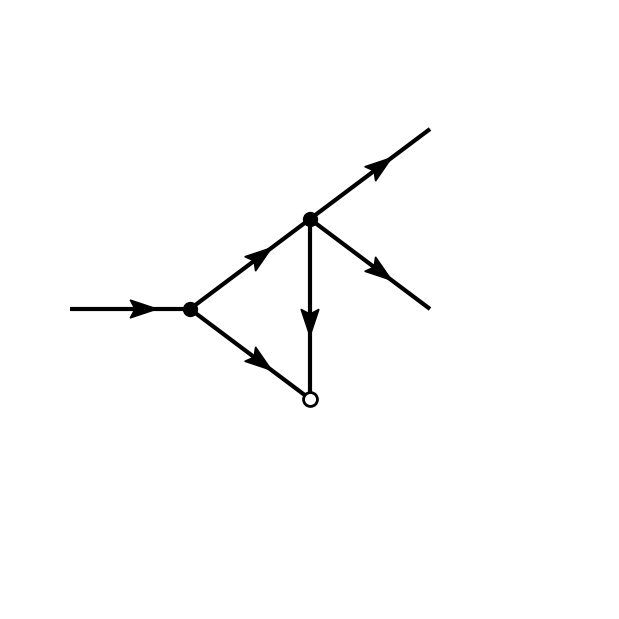

12*D*K_d*Lambda**d*c2*d**2*u*δl/(4*Lambda**2*d**2*kappa**2 + 8*Lambda**2*d*kappa**2) + 24*D*K_d*Lambda**d*c2*d*u*δl/(4*Lambda**2*d**2*kappa**2 + 8*Lambda**2*d*kappa**2) + 6*D*K_d*Lambda**d*c3*d**2*u*δl/(4*Lambda**2*d**2*kappa**2 + 8*Lambda**2*d*kappa**2) - 24*D*K_d*Lambda**d*c3*u*δl/(4*Lambda**2*d**2*kappa**2 + 8*Lambda**2*d*kappa**2) + q**2*(-6*D*K_d*Lambda**d*c1*d**2*u*δl/(4*Lambda**4*d**2*kappa**2 + 8*Lambda**4*d*kappa**2) - 12*D*K_d*Lambda**d*c1*d*u*δl/(4*Lambda**4*d**2*kappa**2 + 8*Lambda**4*d*kappa**2) - 6*D*K_d*Lambda**d*c2*d**2*u*δl/(4*Lambda**4*d**2*kappa**2 + 8*Lambda**4*d*kappa**2) - 12*D*K_d*Lambda**d*c2*d*u*δl/(4*Lambda**4*d**2*kappa**2 + 8*Lambda**4*d*kappa**2) - 3*D*K_d*Lambda**d*c3*d**2*u*δl/(4*Lambda**4*d**2*kappa**2 + 8*Lambda**4*d*kappa**2) + 12*D*K_d*Lambda**d*c3*d*u*δl/(4*Lambda**4*d**2*kappa**2 + 8*Lambda**4*d*kappa**2))

3*D*K_d**2*Lambda**(2*d - 4)*u*δl**2*(2*Lambda**2*(2*c2*d**2 + 4*c2*d + c3*d**2 - 4*c3) - d*q**2*(2*c1*d + 4*c1 + 2*c2*d + 4*c2 + c3*d - 4*c3))/(4*d*kappa**2*(d + 2))

In [5]:
#figure c
v = [Vertex() for i in range(3)]
v[0].link_vertex(v[1])
v[0].link_vertex(v[2])
v[2].link_vertex(v[1])
v[2].add_outgoing()
v[2].add_outgoing()

g = Graph(v)
g.plot_graph()
g.latex_graph('graph_plot')

I_array = integrals_symmet(v, q, [p,q-p], f, D, k, alpha, a, v2, v3)
Ic = solve_integrals_symmet(I_array, k, [q, p], d, n=3)
display(Ic)
display(symvec.integrate_magnitude(Ic, k, d, q, p))



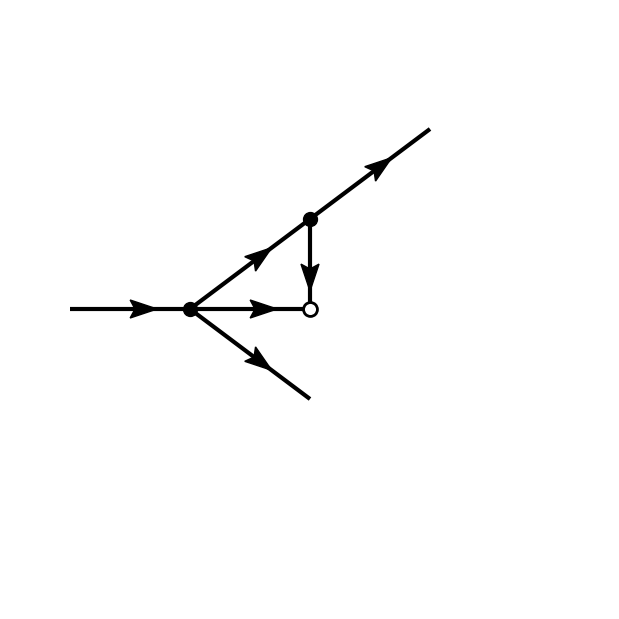

-3*D*K_d*Lambda**d*c1*u*δl/(Lambda**2*kappa**2) + p**2*(-3*D*K_d*Lambda**d*c1*u*δl/(2*Lambda**4*kappa**2) + 3*D*K_d*Lambda**d*c1*u*δl/(Lambda**4*d*kappa**2) + 6*D*K_d*Lambda**d*c2*u*δl/(Lambda**4*d*kappa**2) + 6*D*K_d*Lambda**d*c3*u*δl/(Lambda**4*kappa**2) - 9*D*K_d*Lambda**d*c3*u*δl/(Lambda**4*d*kappa**2)) + p*q*(3*D*K_d*Lambda**d*c1*cos_psi*u*δl/(2*Lambda**4*kappa**2) - 3*D*K_d*Lambda**d*c1*cos_psi*u*δl/(Lambda**4*d*kappa**2) - 6*D*K_d*Lambda**d*c2*cos_psi*u*δl/(Lambda**4*d*kappa**2) - 6*D*K_d*Lambda**d*c3*cos_psi*u*δl/(Lambda**4*kappa**2) + 9*D*K_d*Lambda**d*c3*cos_psi*u*δl/(Lambda**4*d*kappa**2)) + q**2*(-3*D*K_d*Lambda**d*c1*u*δl/(4*Lambda**4*kappa**2) + 3*D*K_d*Lambda**d*c1*u*δl/(2*Lambda**4*d*kappa**2) + 3*D*K_d*Lambda**d*c2*u*δl/(Lambda**4*d*kappa**2) + 3*D*K_d*Lambda**d*c3*u*δl/(Lambda**4*kappa**2) - 9*D*K_d*Lambda**d*c3*u*δl/(2*Lambda**4*d*kappa**2))

In [6]:
#figure d
v = [Vertex() for i in range(3)]
v[0].link_vertex(v[1])
v[0].link_vertex(v[2])
v[2].link_vertex(v[1])
v[0].add_outgoing()
v[2].add_outgoing()

g = Graph(v)
g.plot_graph()
g.latex_graph('graph_plot')

I_array = integrals_symmet(v, q, [p,q-p], f, D, k, alpha, a, v2, v3)
Id = solve_integrals_symmet(I_array, k, [q, p], d, n=3)
display(Id)



In [19]:
def expand_2vertex(expr, k, q, p):
    """
    Expands the coefficients of the renormalized 2-vertex
    Returns dictionary of the coefficients of the monomials
    """
    cs_psi, si_psi = sympy.symbols('cos_psi sin_psi')
    dot_qp = symvec.dots[frozenset((q.sym,p.sym))]
    expr = expr[0]/expr[1]
    expr = expr.subs(dot_qp,q.sym*p.sym*cs_psi)
    return symvec.all_coeffs(expr,[q.sym,p.sym,cs_psi])

def compare_coeffs(dict1,dict_original,k,q,p):
    """
    Returns equations between the renormalized model parameters and the original model parameters
    """
    cs_psi, si_psi = sympy.symbols('cos_psi sin_psi')
    eqts = [0]*len(dict1)
    i=0
    for key in dict1:
        eqts[i]= dict1.get(key) - dict_original.get(key)
        i+=1
    eqts = [i for i in eqts if i != 0]
    return eqts[1:]

def renormalize_2vertex(expr,k,q,p,d):
    """
    Matches the coefficients of the 2-vertex with the renormalized 2-vertex.
    """
    coeffs=symvec.func_coef(expr, q, p)
    coeffs_original = expand_2vertex(v2t(p,q-p,q),k,q,p)
    eqts= compare_coeffs(coeffs,coeffs_original,k,q,p)
    return list(linsolve(eqts, [c1t, c2t, c3t]))[0]
I2=Poly(Ia+Ib,q.sym,p.sym).as_expr()


-16*D*K_d*Lambda**d*c1**2*c2*d**3*δl/(32*d**3*kappa**3 + 64*d**2*kappa**3) - 8*D*K_d*Lambda**d*c1**2*c2*d**3*δl/(16*d**3*kappa**3 + 32*d**2*kappa**3) - 32*D*K_d*Lambda**d*c1**2*c2*d**2*δl/(32*d**3*kappa**3 + 64*d**2*kappa**3) - 16*D*K_d*Lambda**d*c1**2*c2*d**2*δl/(16*d**3*kappa**3 + 32*d**2*kappa**3) - 8*D*K_d*Lambda**d*c1**2*c3*d**3*δl/(32*d**3*kappa**3 + 64*d**2*kappa**3) - 4*D*K_d*Lambda**d*c1**2*c3*d**3*δl/(16*d**3*kappa**3 + 32*d**2*kappa**3) + 32*D*K_d*Lambda**d*c1**2*c3*d*δl/(32*d**3*kappa**3 + 64*d**2*kappa**3) + 16*D*K_d*Lambda**d*c1**2*c3*d*δl/(16*d**3*kappa**3 + 32*d**2*kappa**3) + p**2*(-24*D*K_d*Lambda**d*c1**2*c2*d**3*δl/(32*Lambda**2*d**3*kappa**3 + 64*Lambda**2*d**2*kappa**3) - 4*D*K_d*Lambda**d*c1**2*c2*d**3*δl/(16*Lambda**2*d**3*kappa**3 + 32*Lambda**2*d**2*kappa**3) - 64*D*K_d*Lambda**d*c1**2*c2*d**2*δl/(32*Lambda**2*d**3*kappa**3 + 64*Lambda**2*d**2*kappa**3) - 32*D*K_d*Lambda**d*c1**2*c2*d*δl/(32*Lambda**2*d**3*kappa**3 + 64*Lambda**2*d**2*kappa**3) + 16*D*K_d*Lamb

D*K_d*Lambda**(d - 2)*c1*δl*(4*c1**2*d**2 + 8*c1**2*d - 4*c1*c2*d**2 - 8*c1*c2*d - 2*c1*c3*d**2 + 8*c1*c3*d + 4*c2**2*d + 8*c2**2 + 14*c2*c3*d**2 + 24*c2*c3*d - 44*c2*c3 + 7*c3**2*d**2 - 11*c3**2*d + 4*c3**2)/(4*d*kappa**3*(d + 2))

D*K_d*Lambda**(d - 2)*c1*δl*(4*c1*c2*d**3 + 8*c1*c2*d**2 + c1*c3*d**3 - 2*c1*c3*d**2 + 4*c1*c3 - 4*c2**2*d**3 - 16*c2**2*d**2 - 16*c2**2*d - 12*c2*c3*d**3 - 12*c2*c3*d**2 + 40*c2*c3*d + 8*c2*c3 - 5*c3**2*d**3 + 6*c3**2*d**2 + 8*c3**2*d - 12*c3**2)/(4*d**2*kappa**3*(d + 2))

D*K_d*Lambda**(d - 2)*c1*c3*δl*(c1*d**3 + 4*c1*d**2 + 4*c1 - 8*c2*d + 8*c2 + 12*c3*d - 12*c3)/(2*d**2*kappa**3*(d + 2))

---


D*K_d*Lambda**(d - 2)*c1*δl*(4*c1**2*d**2 + 8*c1**2*d - 4*c1*c2*d**2 - 8*c1*c2*d - 2*c1*c3*d**2 + 8*c1*c3*d + 4*c2**2*d + 8*c2**2 + 14*c2*c3*d**2 + 24*c2*c3*d - 44*c2*c3 + 7*c3**2*d**2 - 11*c3**2*d + 4*c3**2)/(4*d*kappa**3*(d + 2))

D*K_d*Lambda**(d - 2)*c1*δl*(4*c1*c2*d**3 + 8*c1*c2*d**2 + c1*c3*d**3 - 2*c1*c3*d**2 + 4*c1*c3 - 4*c2**2*d**3 - 16*c2**2*d**2 - 16*c2**2*d - 12*c2*c3*d**3 - 12*c2*c3*d**2 + 40*c2*c3*d + 8*c2*c3 - 5*c3**2*d**3 + 6*c3**2*d**2 + 8*c3**2*d - 12*c3**2)/(4*d**2*kappa**3*(d + 2))

D*K_d*Lambda**(d - 2)*c1*c3*δl*(c1*d**3 + 4*c1*d**2 + 4*c1 - 8*c2*d + 8*c2 + 12*c3*d - 12*c3)/(2*d**2*kappa**3*(d + 2))

# Calculation of diagrams contributing to 3-vertex:

In [ ]:
from IPython.display import Image 
pil_img = Image(filename='./figures/modelB_plus_3vertex.jpg')
display(pil_img)

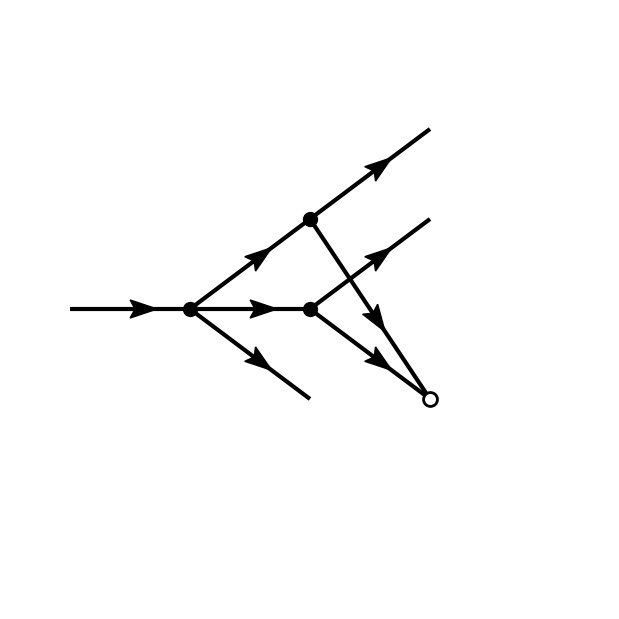

-3*D*K_d*Lambda**d*c1**2*u*δl/(2*Lambda**2*kappa**3)

In [9]:
import graph
from graph import *
import copy
import itertools

# figure e
v = [Vertex() for i in range(4)]
v[0].link_vertex(v[1])
v[1].link_vertex(v[2])
v[0].link_vertex(v[3])
v[3].link_vertex(v[2])
v[0].add_outgoing()
v[1].add_outgoing()
v[3].add_outgoing()

I_array = []
g = Graph(v)
g.plot_graph()
g.latex_graph('graph_plot')
I_array = integrals_symmet(v, q, [p,r,q-p-r], f, D, k, alpha, a, v2, v3)
I_array = [(element[0].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)]), element[1].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)])) for element in I_array]

Ie = solve_integrals_symmet(I_array, k, [q, p], d, n=1)
display(Ie)

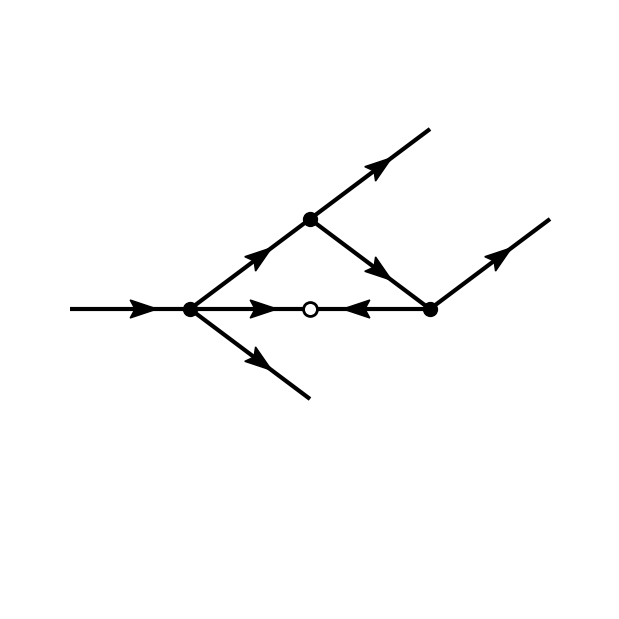

-3*D*K_d*Lambda**d*c1**2*u*δl/(2*Lambda**2*kappa**3)

In [10]:
import graph
from graph import *
import copy
import itertools

# figure f
v = [Vertex() for i in range(4)]
v[0].link_vertex(v[1])
v[0].link_vertex(v[2])
v[2].link_vertex(v[3])
v[3].link_vertex(v[1])
v[0].add_outgoing()
v[2].add_outgoing()
v[3].add_outgoing()

I_array = []
g = Graph(v)
g.plot_graph()
g.latex_graph('graph_plot')
I_array = integrals_symmet(v, q, [p,r,q-p-r], f, D, k, alpha, a, v2, v3)
I_array = [(element[0].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)]), element[1].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)])) for element in I_array]

If = solve_integrals_symmet(I_array, k, [q, p], d, n=1)
display(If)


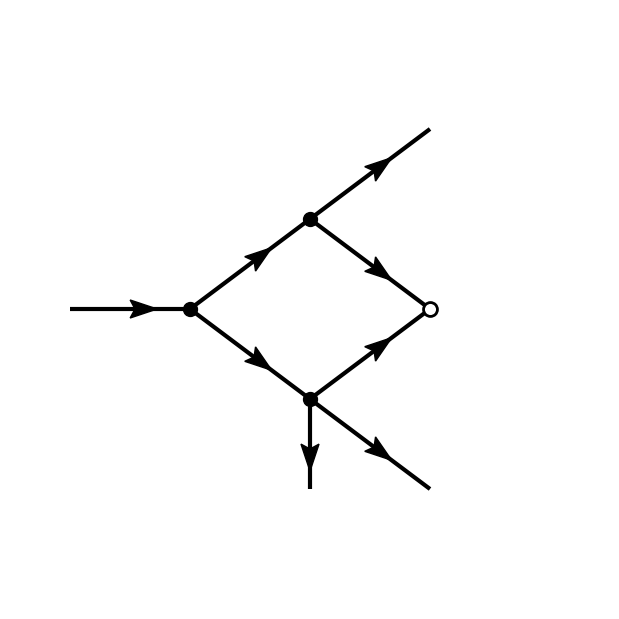

(-6*D*u*(3*k**2*kappa + kappa*(-2*(k·q) + k**2 + q**2))*(2*(k·q)**2*c3 + 2*(k·q)*c2*q**2 - (k·q)*c3*q**2 + c1*q**4 - 2*c2*k**2*q**2 - c3*k**2*q**2)*(4*(k·q)**2*c1 + 4*(k·q)**2*c2 - 4*(k·q)*c1*k**2 - 4*(k·q)*c1*q**2 - 2*(k·q)*c2*k**2 - 2*(k·q)*c2*q**2 + (k·q)*c3*k**2 + (k·q)*c3*q**2 + c1*k**4 + 2*c1*k**2*q**2 + c1*q**4 - 2*c3*k**2*q**2),
 24*k**4*kappa**2*q**2*(k**2*kappa + kappa*(-2*(k·q) + k**2 + q**2))**2*(-4*(k·q) + 2*k**2 + 2*q**2))

(-6*D*c1*k**4*u*(3*k**2*kappa + kappa*(2*(k·q) + k**2 + q**2))*(2*(k·q)**2*c3 - 2*(k·q)*c2*q**2 + (k·q)*c3*q**2 + c1*q**4 - 2*c2*k**2*q**2 - c3*k**2*q**2),
 48*k**6*kappa**2*q**2*(k**2*kappa + kappa*(2*(k·q) + k**2 + q**2))**2)

(-6*D*u*(3*k**2*kappa + kappa*(-2*(k·q) + k**2 + q**2))*(2*(k·q)**2*c3 + 2*(k·q)*c2*q**2 - (k·q)*c3*q**2 + c1*q**4 - 2*c2*k**2*q**2 - c3*k**2*q**2)*(4*(k·q)**2*c1 + 4*(k·q)**2*c2 - 4*(k·q)*c1*k**2 - 4*(k·q)*c1*q**2 - 2*(k·q)*c2*k**2 - 2*(k·q)*c2*q**2 + (k·q)*c3*k**2 + (k·q)*c3*q**2 + c1*k**4 + 2*c1*k**2*q**2 + c1*q**4 - 2*c3*k**2*q**2),
 24*k**4*kappa**2*q**2*(k**2*kappa + kappa*(-2*(k·q) + k**2 + q**2))**2*(-4*(k·q) + 2*k**2 + 2*q**2))

(-6*D*c1*k**4*u*(3*k**2*kappa + kappa*(2*(k·q) + k**2 + q**2))*(2*(k·q)**2*c3 - 2*(k·q)*c2*q**2 + (k·q)*c3*q**2 + c1*q**4 - 2*c2*k**2*q**2 - c3*k**2*q**2),
 48*k**6*kappa**2*q**2*(k**2*kappa + kappa*(2*(k·q) + k**2 + q**2))**2)

(-6*D*c1*k**4*u*(3*k**2*kappa + kappa*(2*(k·q) + k**2 + q**2))*(2*(k·q)**2*c3 - 2*(k·q)*c2*q**2 + (k·q)*c3*q**2 + c1*q**4 - 2*c2*k**2*q**2 - c3*k**2*q**2),
 48*k**6*kappa**2*q**2*(k**2*kappa + kappa*(2*(k·q) + k**2 + q**2))**2)

(-6*D*c1*k**4*u*(3*k**2*kappa + kappa*(2*(k·q) + k**2 + q**2))*(2*(k·q)**2*c3 - 2*(k·q)*c2*q**2 + (k·q)*c3*q**2 + c1*q**4 - 2*c2*k**2*q**2 - c3*k**2*q**2),
 48*k**6*kappa**2*q**2*(k**2*kappa + kappa*(2*(k·q) + k**2 + q**2))**2)

---


3*D*K_d*Lambda**d*c1*c2*u*δl/(2*Lambda**2*kappa**3) + 3*D*K_d*Lambda**d*c1*c3*u*δl/(4*Lambda**2*kappa**3) - 3*D*K_d*Lambda**d*c1*c3*u*δl/(2*Lambda**2*d*kappa**3)

In [11]:
import graph
from graph import *
import copy
import itertools

# figure g
v = [Vertex() for i in range(4)]
v[0].link_vertex(v[1])
v[1].link_vertex(v[2])
v[0].link_vertex(v[3])
v[3].link_vertex(v[2])
v[1].add_outgoing()
v[1].add_outgoing()
v[3].add_outgoing()

I_array = []
g = Graph(v)
g.plot_graph()
g.latex_graph('graph_plot')
I_array = integrals_symmet(v, q, [p,r,q-p-r], f, D, k, alpha, a, v2, v3)
I_array = [(element[0].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)]), element[1].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)])) for element in I_array]

Ig = solve_integrals_symmet(I_array, k, [q, p], d, n=1)
display(Ig)


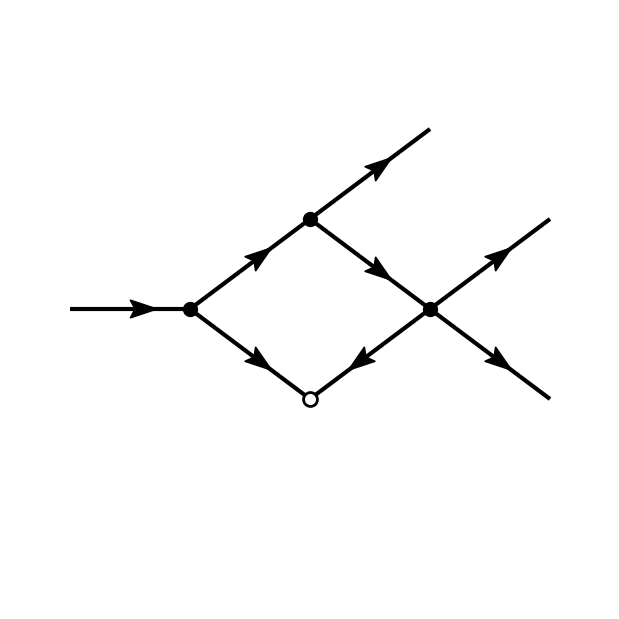

(-12*D*u*(4*(k·q)**2*c1 - 4*(k·q)*c1*k**2 - 4*(k·q)*c1*q**2 + c1*k**4 + 2*c1*k**2*q**2 + c1*q**4)*(2*(k·q)**2*c3 + 2*(k·q)*c2*q**2 - (k·q)*c3*q**2 + c1*q**4 - 2*c2*k**2*q**2 - c3*k**2*q**2),
 12*k**2*kappa*q**2*(k**2*kappa + kappa*(-2*(k·q) + k**2 + q**2))**2*(-4*(k·q) + 2*k**2 + 2*q**2))

(-12*D*u*(4*(k·q)**2*c1 - 4*(k·q)*c1*k**2 - 4*(k·q)*c1*q**2 + c1*k**4 + 2*c1*k**2*q**2 + c1*q**4)*(2*(k·q)**2*c3 + 2*(k·q)*c2*q**2 - (k·q)*c3*q**2 + c1*q**4 - 2*c2*k**2*q**2 - c3*k**2*q**2),
 12*k**2*kappa*q**2*(k**2*kappa + kappa*(-2*(k·q) + k**2 + q**2))**2*(-4*(k·q) + 2*k**2 + 2*q**2))

3*D*K_d*Lambda**d*c1*c2*u*δl/(2*Lambda**2*kappa**3) + 3*D*K_d*Lambda**d*c1*c3*u*δl/(4*Lambda**2*kappa**3) - 3*D*K_d*Lambda**d*c1*c3*u*δl/(2*Lambda**2*d*kappa**3)

In [12]:
import graph
from graph import *
import copy
import itertools

# figure h
v = [Vertex() for i in range(4)]
v[0].link_vertex(v[1])
v[0].link_vertex(v[2])
v[2].link_vertex(v[3])
v[3].link_vertex(v[1])
v[3].add_outgoing()
v[3].add_outgoing()
v[2].add_outgoing()

I_array = []
g = Graph(v)
g.plot_graph()
g.latex_graph('graph_plot')
I_array = integrals_symmet(v, q, [p,r,q-p-r], f, D, k, alpha, a, v2, v3)
I_array = [(element[0].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)]), element[1].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)])) for element in I_array]

Ih = solve_integrals_symmet(I_array, k, [q, p], d, n=1)
display(Ih)

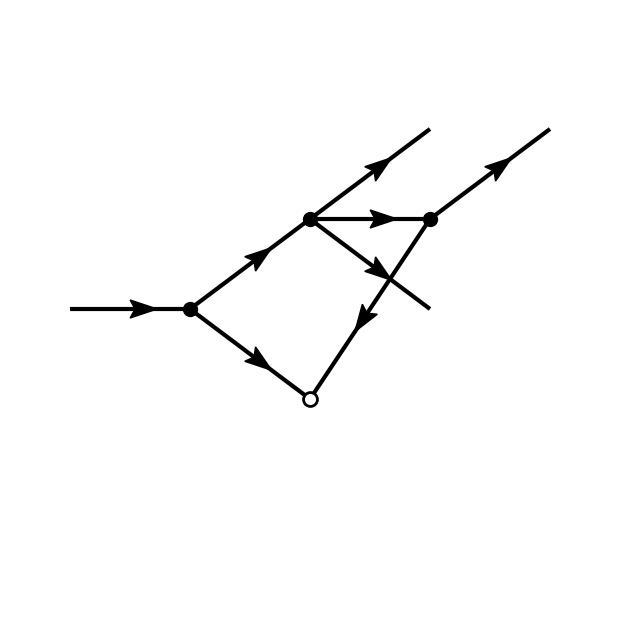

3*D*K_d*Lambda**d*c1*c2*u*δl/(2*Lambda**2*kappa**3) + 3*D*K_d*Lambda**d*c1*c3*u*δl/(4*Lambda**2*kappa**3) - 3*D*K_d*Lambda**d*c1*c3*u*δl/(2*Lambda**2*d*kappa**3)

In [13]:
import graph
from graph import *
import copy
import itertools

# figure i
v = [Vertex() for i in range(4)]
v[0].link_vertex(v[1])
v[0].link_vertex(v[2])
v[2].link_vertex(v[3])
v[3].link_vertex(v[1])
v[2].add_outgoing()
v[2].add_outgoing()
v[3].add_outgoing()

I_array = []
g = Graph(v)
g.plot_graph()
g.latex_graph('graph_plot')
I_array = integrals_symmet(v, q, [p,r,q-p-r], f, D, k, alpha, a, v2, v3)
I_array = [(element[0].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)]), element[1].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)])) for element in I_array]

Ii = solve_integrals_symmet(I_array, k, [q, p], d, n=1)
display(Ii)


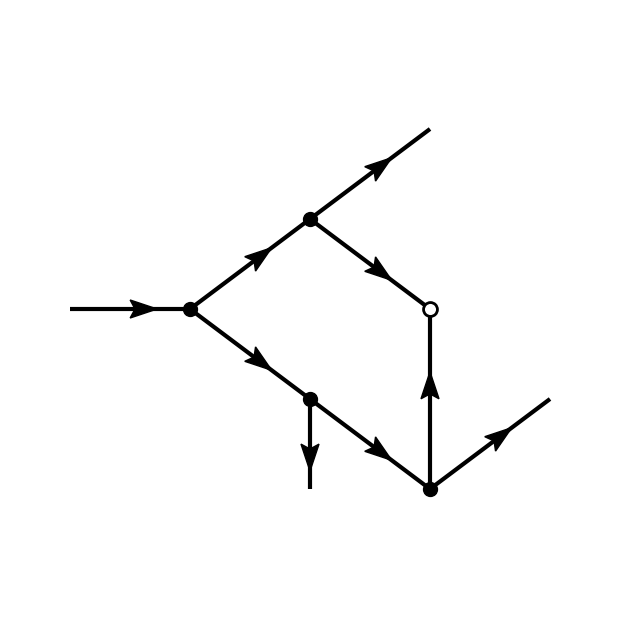

-3*D*K_d*Lambda**d*c1**3*c2*δl/(8*kappa**4) - 3*D*K_d*Lambda**d*c1**3*c3*δl/(16*kappa**4) + 3*D*K_d*Lambda**d*c1**3*c3*δl/(8*d*kappa**4)

In [14]:
import graph
from graph import *
import copy
import itertools

# figure j
v = [Vertex() for i in range(5)]
v[0].link_vertex(v[1])
v[1].link_vertex(v[2])
v[2].link_vertex(v[3])
v[0].link_vertex(v[4])
v[4].link_vertex(v[3])
v[1].add_outgoing()
v[2].add_outgoing()
v[4].add_outgoing()

I_array = []
g = Graph(v)
g.plot_graph()
g.latex_graph('graph_plot')
I_array = integrals_symmet(v, q, [p,r,q-p-r], f, D, k, alpha, a, v2, v3)
I_array = [(element[0].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)]), element[1].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)])) for element in I_array]

Ij = solve_integrals_symmet(I_array, k, [q, p], d, n=1)
display(Ij)


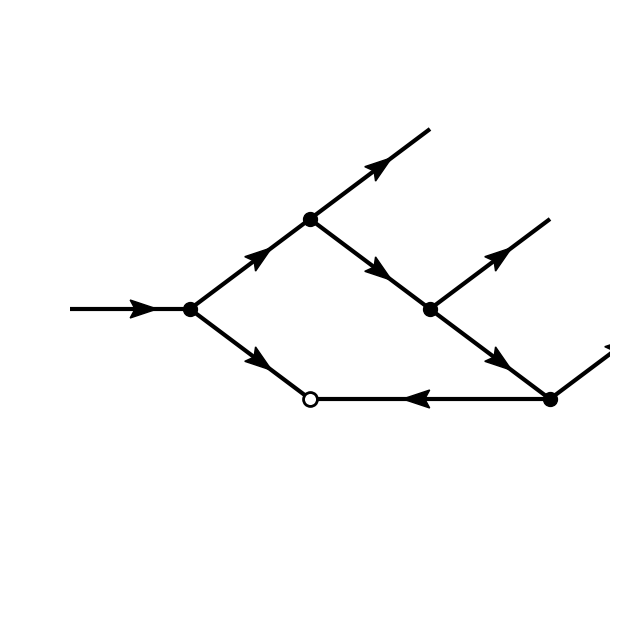

-D*K_d*Lambda**d*c1**3*c2*δl/(4*kappa**4) - D*K_d*Lambda**d*c1**3*c3*δl/(8*kappa**4) + D*K_d*Lambda**d*c1**3*c3*δl/(4*d*kappa**4)

In [15]:
import graph
from graph import *
import copy
import itertools

# figure k
v = [Vertex() for i in range(5)]
v[0].link_vertex(v[1])
v[0].link_vertex(v[2])
v[2].link_vertex(v[3])
v[3].link_vertex(v[4])
v[4].link_vertex(v[1])
v[2].add_outgoing()
v[3].add_outgoing()
v[4].add_outgoing()

I_array = []
g = Graph(v)
g.plot_graph()
g.latex_graph('graph_plot')
I_array = integrals_symmet(v, q, [p,r,q-r-p], f, D, k, alpha, a, v2, v3)
I_array = [(element[0].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)]), element[1].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)])) for element in I_array]

Ik = solve_integrals_symmet(I_array, k, [q, p], d, n=1)
display(Ik)


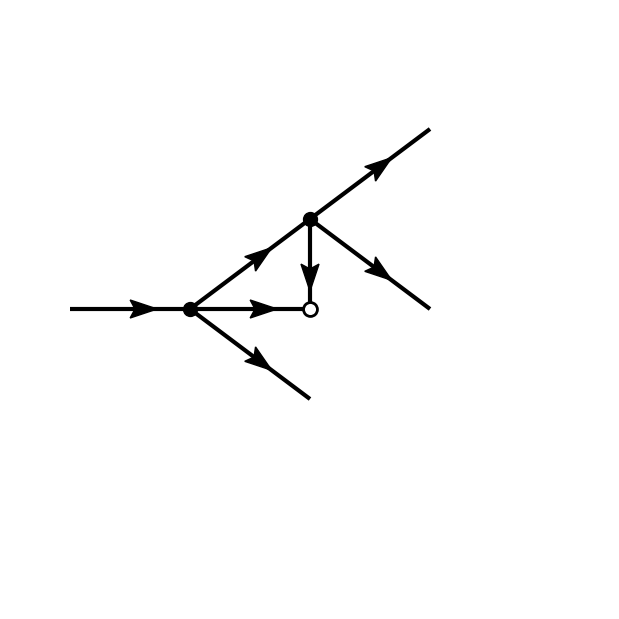

9*D*K_d*Lambda**d*u**2*δl/(Lambda**4*kappa**2)

In [16]:
import graph
from graph import *
import copy
import itertools

# figure 3c
v = [Vertex() for i in range(3)]
v[0].link_vertex(v[1])
v[0].link_vertex(v[2])
v[2].link_vertex(v[1])
v[0].add_outgoing()
v[2].add_outgoing()
v[2].add_outgoing()

I_array = []
g = Graph(v)
g.plot_graph()
g.latex_graph('graph_plot')
I_array = integrals_symmet(v, q, [p,r,q-p-r], f, D, k, alpha, a, v2, v3)
I_array = [(element[0].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)]), element[1].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)])) for element in I_array]

I3c = solve_integrals_symmet(I_array, k, [q, p], d, n=1)
display(I3c)


In [23]:
print('2 Vertex')
display(simplify(I2))
sol_c1t, sol_c2t, sol_c3t = renormalize_2vertex(I2,k,q,p,d)
c1ab=simplify(sol_c1t)
c2ab=simplify(sol_c2t)
c3ab=simplify(sol_c3t)
display(simplify(c1ab))
display(simplify(c2ab))
display(simplify(c3ab))
print('3 vertex:')
Iefghi=Poly(Ie+If+Ig+Ih+Ii,q.sym).as_expr()
display(Iefghi)
Ijk=Poly(Ij+Ik,q.sym).as_expr()
display(Ijk)
I3c=Poly(I3c,q.sym).as_expr()
display(I3c)
display(simplify(Iefghi))
display(simplify(Ijk))
display(simplify(I3c))


2 Vertex


D*K_d*Lambda**(d - 2)*c1*δl*(4*Lambda**2*c1*d*(-2*c2*d**2 - 4*c2*d - c3*d**2 + 4*c3) - 2*cos_psi*d*p*q*(-4*c1*c2*d**2 - 8*c1*c2*d + 6*c1*c3*d + 4*c2**2*d**2 + 16*c2**2*d + 16*c2**2 + 12*c2*c3*d**2 + 12*c2*c3*d - 48*c2*c3 + 5*c3**2*d**2 - 6*c3**2*d + 4*c3**2) + d*q**2*(4*c1**2*d**2 + 8*c1**2*d - 4*c1*c2*d**2 - 8*c1*c2*d - 2*c1*c3*d**2 + 8*c1*c3*d + 4*c2**2*d + 8*c2**2 + 14*c2*c3*d**2 + 24*c2*c3*d - 44*c2*c3 + 7*c3**2*d**2 - 11*c3**2*d + 4*c3**2) + p**2*(-8*c1*c2*d**3 - 16*c1*c2*d**2 + 4*c1*c3*cos_psi**2*d**3 + 16*c1*c3*cos_psi**2*d**2 + 16*c1*c3*cos_psi**2 - 4*c1*c3*d**3 - 4*c1*c3*d**2 - 16*c1*c3 + 8*c2**2*d**3 + 32*c2**2*d**2 + 32*c2**2*d - 32*c2*c3*cos_psi**2*d + 32*c2*c3*cos_psi**2 + 24*c2*c3*d**3 + 24*c2*c3*d**2 - 64*c2*c3*d - 32*c2*c3 + 48*c3**2*cos_psi**2*d - 48*c3**2*cos_psi**2 + 10*c3**2*d**3 - 12*c3**2*d**2 - 40*c3**2*d + 48*c3**2))/(8*d**2*kappa**3*(d + 2))

D*K_d*Lambda**(d - 2)*c1*δl*(4*c1**2*d**2 + 8*c1**2*d - 4*c1*c2*d**2 - 8*c1*c2*d - 2*c1*c3*d**2 + 8*c1*c3*d + 4*c2**2*d + 8*c2**2 + 14*c2*c3*d**2 + 24*c2*c3*d - 44*c2*c3 + 7*c3**2*d**2 - 11*c3**2*d + 4*c3**2)/(4*d*kappa**3*(d + 2))

D*K_d*Lambda**(d - 2)*c1*δl*(4*c1*c2*d**3 + 8*c1*c2*d**2 + c1*c3*d**3 - 2*c1*c3*d**2 + 4*c1*c3 - 4*c2**2*d**3 - 16*c2**2*d**2 - 16*c2**2*d - 12*c2*c3*d**3 - 12*c2*c3*d**2 + 40*c2*c3*d + 8*c2*c3 - 5*c3**2*d**3 + 6*c3**2*d**2 + 8*c3**2*d - 12*c3**2)/(4*d**2*kappa**3*(d + 2))

D*K_d*Lambda**(d - 2)*c1*c3*δl*(c1*d**3 + 4*c1*d**2 + 4*c1 - 8*c2*d + 8*c2 + 12*c3*d - 12*c3)/(2*d**2*kappa**3*(d + 2))

3 vertex:


-3*D*K_d*Lambda**d*c1**2*u*δl/(Lambda**2*kappa**3) + 9*D*K_d*Lambda**d*c1*c2*u*δl/(2*Lambda**2*kappa**3) + 9*D*K_d*Lambda**d*c1*c3*u*δl/(4*Lambda**2*kappa**3) - 9*D*K_d*Lambda**d*c1*c3*u*δl/(2*Lambda**2*d*kappa**3)

-5*D*K_d*Lambda**d*c1**3*c2*δl/(8*kappa**4) - 5*D*K_d*Lambda**d*c1**3*c3*δl/(16*kappa**4) + 5*D*K_d*Lambda**d*c1**3*c3*δl/(8*d*kappa**4)

9*D*K_d*Lambda**d*u**2*δl/(Lambda**4*kappa**2)

3*D*K_d*Lambda**(d - 2)*c1*u*δl*(-4*c1*d + 6*c2*d + 3*c3*d - 6*c3)/(4*d*kappa**3)

5*D*K_d*Lambda**d*c1**3*δl*(2*c3 - d*(2*c2 + c3))/(16*d*kappa**4)

9*D*K_d*Lambda**(d - 4)*u**2*δl/kappa**2